# A/B test-分组对照试验

- 案例 1：[A/B 检验：新版网页更有吸引力吗？](https://github.com/renatofillinich/ab_test_guide_in_python/blob/master/AB%20testing%20with%20Python.ipynb)
- 案例 2：[A/B 检验：支付宝营销策略效果分析](https://www.cnblogs.com/ministep/p/18278179)

## 简介

近年来，金融科技公司不断尝试提升贷款客户的还款率。例如，「某金融公司」通过数据分析发现，许多客户因遗忘或忽视账单信息而逾期。市场与风控团队提出：**如果在还款日前定时发送短信提醒，能否显著提升客户的按时还款率？**

在全面推行这个新策略之前，公司希望通过科学方法验证其有效性。目前的验证方法有如下几种：

- **用户调查**：通过问卷了解客户对短信提醒的态度。
- **历史数据分析**：随即挑选 1000 名客户，对他们实施新的策略——「短信提醒」，分析他们在新旧两种策略下的还款率差异。
- **A/B 测试**：将客户随机分为两组，一组接受短信提醒，另一组不接受，比较两组的还款率差异。

> **讨论**：上述三种方法的优点和缺点是什么？


### 什么是 A/B 测试？

A/B 测试，也被称为分组对照实验（Randomized Controlled Trial, RCT），是数据分析和产品优化领域中常用的一种实验设计方法。A/B 测试通过将用户或样本**随机分为两组**——实验组 (B 组) 和对照组 (A 组)，并分别施加不同的处理或策略，比较两组关键指标的差异，从而评估某项新方案或改进措施是否有效。

**应用场景举例**：

  * 电商平台测试新页面设计是否提升转化率
  * 金融公司测试短信提醒是否提升客户还款率
  * 餐饮店「直接打折」v.s.「赠送现金券」的促销效果

A/B 测试以其**操作简单、原理严谨、结果直观**的特点，被广泛应用于互联网、零售、金融等行业的数据驱动决策流程中。

### A/B 测试的基本流程

1. **明确实验目标**：如提升转化率、点击率或收入
2. **确定实验组与对照组**：通常采用**随机分组**，保证组间差异仅来源于处理
3. **实施实验**：对实验组应用新策略，对照组保持原有方案
4. **收集数据**：追踪并记录各组的核心指标
5. **统计检验**：比较两组指标的显著性差异
6. **结果分析与决策**：判断新策略是否优于原方案


## 案例引入与问题设定

### 案例背景：咖啡店促销策略优化

假设你在某连锁咖啡品牌的运营团队工作。近期，为了提升门店销量，市场部设计了两种不同的促销方案：

* **A 方案（对照组）**：原有满 30 元减 5 元活动
* **B 方案（实验组）**：满 40 元减 10 元活动

日常运营中，人们常常认为加大折扣就一定能带来更高消费，但实际效果却受到多种因素影响。只有通过**随机分组实验**和统计检验，才能避免偶然性和主观偏差，客观评估新策略的价值。

为此，门店计划进行为期一个月的测试，在此期间，将顾客随机分为两组，分别接受 A 或 B 方案。管理层希望通过 A/B 测试，判断哪种方案能更有效地提升人均消费金额。

### 指标设定与分析思路

* **核心指标**：人均消费金额
* **数据需求**：每位顾客的消费金额、所属促销组别
* **分析思路**：

  * 对比两组顾客的人均消费金额
  * 采用 t 检验或非参数检验判断差异是否显著
  * 对结果进行业务解读，提出运营建议




## 随机分组与实验控制

A/B 测试的关键在于科学分组。**随机分组**意味着每一个样本都被赋予相同的概率进入实验组或对照组，从而最大程度上消除两组间的系统性差异，使实验结果具有因果解释力。

### 如何实现随机分组？

在业务系统中，常见做法有按照用户 ID 尾号、系统随机数等方式分配用户，也可以利用 Python 中的 `numpy` 包提供的随机抽样函数直接实现。

下面是 Python 的实现方式示例：

```python
import numpy as np
import pandas as pd

# 模拟 1000 位顾客
df = pd.DataFrame({'customer_id': np.arange(1000)})
# 随机分配到实验组(B)或对照组(A)
df['group'] = np.random.choice(['A', 'B'], size=1000)
```

### 分层随机分组

**分层随机分组**（Stratified Randomization）是指先将样本按某些关键特征分层，然后在每一层内进行独立的随机分组，以保证组间关键变量的分布均衡。

**实践建议**：分层变量可以是性别、年龄段、会员等级、地域等类别变量。在如下几种情况下，建议使用分层随机分组：

- 当核心指标受某些特征影响较大时 (如短信提醒对不同年龄段的客户效果不同)，如果完全随机分组，容易导致这些特征在两组间分布不均，影响实验结果的解释性。
- 当样本量较小，且样本在各个组别中的分布很不均匀时，分层随机分组可以保证各组抽样的代表性 (抽样的相对比例保持一致)

Python 实现举例：

```python
# 以性别为分层变量
df['gender'] = np.random.choice(['male', 'female'], size=1000)
df['group'] = (
    df.groupby('gender')['customer_id']
      .transform(lambda x: np.random.choice(['A', 'B'], 
      size=len(x)))
)
```

## 核心指标及多指标综合评价

A/B 测试的成败，很大程度上取决于你设定的**评价指标**。不同业务场景会选取不同的核心指标。常见的指标如下：

**转化率（Conversion Rate）**：完成特定目标（如下单、注册、付费）的用户比例。

$$
    \text{转化率} = \frac{\text{转化用户数}}{\text{总用户数}}
$$

**点击率（Click Through Rate, CTR）**：广告、页面等在一段时间内被点击次数占总展示次数的比例。

$$
    \text{点击率} = \frac{\text{点击次数}}{\text{展示次数}}
$$

**复购率（Repeat Purchase Rate）**：在指定时期内，发生过多次购买的用户比例。

$$
    \text{复购率} = \frac{\text{多次购买用户数}}{\text{总用户数}}
$$

**多指标综合评价**

在实际分析中，通常不会只看一个指标。例如，电商会同时关注点击率、转化率、客单价、利润率等多个指标。因为，有些政策或策略虽然在某个指标上收效良好，但却可能对其他指标产生负面影响，反之亦然。

需要注意的是，当同时关注多个指标时，要注意**多重检验问题**，即检验的指标越多，“误判为有效”的概率也会上升。常用如 [Bonferroni 修正](https://en.wikipedia.org/wiki/Bonferroni_correction) 等方法，调整各项检验的显著性水平，降低假阳性的概率。  



## 统计检验方法详解

### 均值差异的 t 检验（独立样本 t 检验）

* **适用场景**：对照组和实验组数据近似正态分布，且样本独立。

* **检验原理**：对比两组均值，判断其差异是否显著。

* **假设**：

  $$
  H_0: \mu_A = \mu_B  \quad v.s. \quad  H_1: \mu_A \neq \mu_B
  $$

* **同方差时，用 Student's t 检验**：

  $$
  t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{s_p^2\left(\frac{1}{n_A} + \frac{1}{n_B}\right)}}
  $$

  其中，

  $$
  s_p^2 = \frac{(n_A - 1)s_A^2 + (n_B - 1)s_B^2}{n_A + n_B - 2}
  $$

  * $\bar{x}_A, \bar{x}_B$：对照组与实验组均值
  
  * $s_A^2, s_B^2$：两组的样本方差
  * $n_A, n_B$：两组的样本容量

* **存在异方差时，用 Welch 检验**：

    $$
    t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
    $$

    自由度采用 Satterthwaite 近似法计算。详见：[Welch's t-test (Wikipedia)](https://en.wikipedia.org/wiki/Welch%27s_t-test)。
    
- Python 代码为：

  ```python
  import scipy.stats
  scipy.stats.ttest_ind(a, b, equal_var=True)  # 同方差
  scipy.stats.ttest_ind(a, b, equal_var=False) # 异方差
  ```

### 非参数检验（Mann-Whitney U 检验）

* **适用场景**：当样本分布偏态或存在异常值时，采用非参数检验方法更稳健。

* **检验原理**：将两组样本混合排序，比较每组的秩和，判断分布是否有统计显著差异。

* **U 统计量计算公式**：

  $$
  U_A = n_A n_B + \frac{n_A(n_A+1)}{2} - R_A
  $$

  其中，$R_A$ 为对照组所有样本的秩次之和，$n_A$、$n_B$ 分别为组容量。详情参见：[Mann-Whitney U test (Wikipedia)](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)。

  Python 代码为：

  ```python
  import scipy.stats
  scipy.stats.mannwhitneyu(a, b, alternative='two-sided')  # 双尾检验
  scipy.stats.mannwhitneyu(a, b, alternative='greater')   # 单尾检验
  ```


### 转化率/比例的 Z 检验

* **适用场景**：核心指标为转化率等比例变量时

* **原假设**：两组转化率无显著差异

* **统计量**：

  $$
  Z = \frac{p_A - p_B}{\sqrt{p(1-p)\left(\frac{1}{n_A} + \frac{1}{n_B}\right)}}
  $$

  其中，

  $$
  p = \frac{n_A p_A + n_B p_B}{n_A + n_B}
  $$

  $p_A, p_B$：两组的转化率

- **原理说明**：Z 检验通过构建标准正态分布下的比较区间，评估比例差异是否显著。
- python 代码为：

  ```python
  import statsmodels.api as sm
  sm.stats.proportions_ztest(
    count=[success_A, success_B], 
    nobs=[n_A, n_B])
  ```   

### 显著性水平、P 值

* **显著性水平（Significance Level, $\alpha$）**

  * 显著性水平 $\alpha$ 通常设为 0.05，表示我们允许有 5% 的概率把本来无差异的组误判为有差异（即“假阳性”）。
  * 在实际分析中，根据业务容忍度可以取 0.01、0.05 或 0.10。

* **P 值（P-value）**：P 值（P-value）是统计推断中判断实验结果是否显著的关键指标。
  - 从专业角度看，P 值表示：在原假设（比如短信提醒没有效果）成立的前提下，观察到当前结果或更极端结果的概率。如果 P 值很小（通常小于 0.05），说明在原假设为真的情况下，我们现在看到的数据几乎很难靠偶然性解释，这就为我们拒绝原假设提供了统计证据。
  - 通俗来讲，P 值越小，表示实验组和对照组之间出现如此大差异“纯属巧合”的可能性越低，因此我们更有理由相信新措施（如短信提醒）确实产生了效果。
  - 但要注意，P 值只是‘差异是否偶然’的统计证据，具体业务决策还要结合实际背景综合判断。**

### 置信区间

**点估计与区间估计**

在 A/B 测试等数据分析中，估计出的 A 组和 B 组的平均差异 $d = \bar{x}_A - \bar{x}_B$ 称为「点估计」。由于它是一个随机变量，单纯看 $d$ 的数值是没有意义的，需要根据其标准误来构造 t 统计量来执行假设检验。

另一种常用的估计方法是**区间估计**，它提供了一个范围而不是单一数值。我们常用**置信区间（Confidence Interval, CI）**来表达对总体参数（如均值、比例等）的不确定性估计。例如，我们估算短信提醒提升还款率，得到「提升幅度的 95% 置信区间为 $[2\%, 5\%]$」。

**置信区间的含义**

* **置信区间**是一种区间估计方法，在一定置信度（比如 95%）下，为总体参数提供一个可能的取值范围。
* 「95%」的本质含义是**如果我们在同样条件下反复采样并计算置信区间，理论上有 95% 的区间会覆盖真实参数值**。

具体解释如下：

如果用同样的估计方法重复很多次实验 (如 $K=1000$ 次)，每次都计算一个区间 $R_k = [L_k, U_k]$，其中 $L_k$ 和 $U_k$ 分别是下限和上限。最终会得到 1000 个区间估计，记为 $\{R_1, R_2, \ldots, R_K\}$。那么，理论上，在这 1000 个置信区间中，约有 950 个 (占比约为 $0.95$) 会包含真实参数 $\mu$。

我们平时所说的「95% 的覆盖率」，指的便是这种多次实验的总体结果。

**单次置信区间的含义**

在实际分析中，我们往往只进行**一次实验**，也只能计算出**一个**置信区间（如 $[2\%, 5\%]$）。对于这一次计算出的区间，**真实参数要么在区间内，要么不在区间内**。我们**不能**说“参数有 95% 的概率落在本次区间内” (这是一种非常普遍的错误理解)。我们只能说，$[2\%, 5\%]$ 有「95% 的可靠性」或「95% 的覆盖率」。



## 样本量与实验效能

样本量不足可能导致“假阴性”（即实际上存在差异，但没有检验出来）。虽然通常来讲，样本量越大，检验的统计效能越高，但过大的样本量会导致资源浪费和计算效率低下。因此，在设计 A/B 测试时，需要合理计算所需的样本量。

**功效分析（Power Analysis）** 用于预先计算所需样本量，以保证检验的敏感性和可靠性。

**样本量计算公式**（以均值差异检验为例）：

  $$
  n = \left(\frac{(Z_{\alpha/2} + Z_{\beta}) \cdot (s_A + s_B)}{d}\right)^2
  $$

  其中：

  * $Z_{\alpha/2}$：显著性水平对应的 Z 值
  
  * $Z_{\beta}$：检验功效对应的 Z 值
  * $s_A, s_B$：两组样本的标准差
  * $d$：期望的最小效应的大小（即两组均值差异）

* **Python 实现**：

  ```python
    import statsmodels.stats.api as sms
    effect_size = sms.proportion_effectsize(p1, p2)  # 计算效应大小
    n = sms.NormalIndPower().solve_power(effect_size=effect_size, alpha=0.05, power=0.8)
  ```


## Python 实操：咖啡店促销方案

本节将以「咖啡店促销方案」为例，完整展示 A/B 测试的数据生成、分组、统计检验和结果可视化的全过程。所有代码均配详细中文注释，便于初学者自学和复现。

### 数据背景与问题回顾

**业务场景简述**  

某连锁咖啡店运营团队为了提升门店人均消费金额，设计了两种促销方案：

* A 方案（对照组）：满 30 元减 5 元
* B 方案（实验组）：满 40 元减 10 元

运营团队在 1000 名顾客中随机分配上述两种方案，希望评估「B 方案」是否能显著提升人均消费。

**分析目标**

* 检验实验组和对照组人均消费金额是否有统计学上的显著差异
* 提供业务解读与决策建议


### 数据模拟与分组



In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 固定随机数种子，确保结果可复现
np.random.seed(42)

# 假定实验组与对照组各 500 人
n_A, n_B = 500, 500

# 设定两组消费金额均值和标准差（单位：元）
mean_A, std_A = 38, 8
mean_B, std_B = 41, 9

# 生成两组消费金额数据（正态分布）
amount_A = np.random.normal(loc=mean_A, scale=std_A, size=n_A)
amount_B = np.random.normal(loc=mean_B, scale=std_B, size=n_B)

# 组装数据为 DataFrame
df = pd.DataFrame({
    'amount': np.concatenate([amount_A, amount_B]),
    'group': ['A']*n_A + ['B']*n_B
})


### 数据可视化与描述统计

#### 描述统计



In [17]:

# 分组描述统计
stats = ['mean', 'std', 'count', 'min', 'max']
summary = df.groupby('group')['amount'].agg(stats)
print(summary.round(1))


       mean  std  count   min   max
group                              
A      38.1  7.9    500  12.1  68.8
B      41.3  8.8    500  16.7  64.7



#### 2. 消费金额分布对比



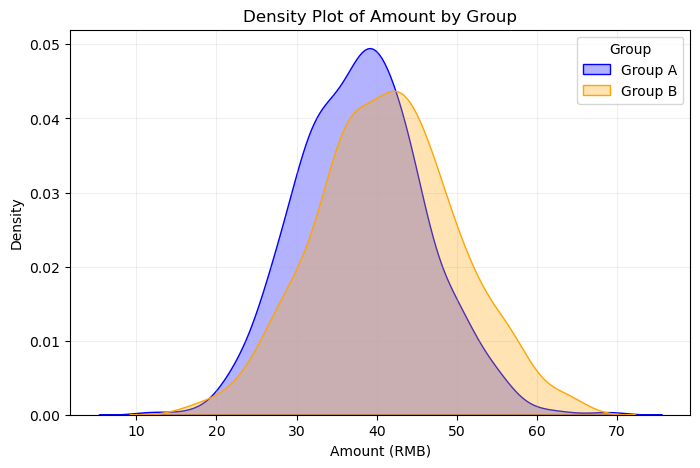

In [7]:
# 绘制实验组与对照组的消费金额密度函数图
plt.figure(figsize=(8, 5))
sns.kdeplot(amount_A, label='Group A', color='blue', fill=True, alpha=0.3)
sns.kdeplot(amount_B, label='Group B', color='orange', fill=True, alpha=0.3)
plt.title('Density Plot of Amount by Group')
plt.xlabel('Amount (RMB)')
plt.ylabel('Density')
plt.legend(title='Group')
plt.grid(alpha=0.2)
# 注释：两组的消费金额分布密度对比
plt.show()



#### 3. 箱线图



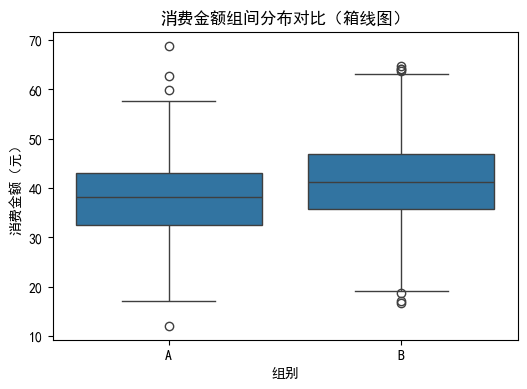

In [9]:

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='group', y='amount')
plt.title('消费金额组间分布对比（箱线图）')
plt.xlabel('组别')
plt.ylabel('消费金额（元）')
plt.show()




### 统计检验

#### 独立样本 t 检验



In [ ]:

from scipy.stats import ttest_ind

# 拆分两组数据
amount_A = df[df['group'] == 'A']['amount']
amount_B = df[df['group'] == 'B']['amount']

# 检验方差齐性
from scipy.stats import levene
stat_levene, p_levene = levene(amount_A, amount_B)
print(f'Levene 检验 P 值：{p_levene:.4f}')

# 执行 t 检验（自动检测方差是否齐性）
equal_var = p_levene > 0.05
t_stat, p_value = ttest_ind(amount_A, amount_B, 
                            equal_var=equal_var)
print(f't 检验 P 值：{p_value:.4f}')


Levene 检验 P 值：0.0146
t 检验 P 值：0.0000



#### Mann-Whitney U 检验（非参数）


In [ ]:

from scipy.stats import mannwhitneyu

u_stat, p_mw = mannwhitneyu(amount_A, amount_B, 
                            alternative='two-sided')
print(f'Mann-Whitney U 检验 P 值：{p_mw:.4f}')


Mann-Whitney U 检验 P 值：0.0000


### 功效分析

计算所需样本量，以保证检验的敏感性和可靠性。


In [ ]:
# 安装 statsmodels（如未安装）
# %pip install statsmodels

from statsmodels.stats.power import TTestIndPower

# 计算效应量（Cohen's d）
effect_size = (mean_B - mean_A) / np.sqrt((std_A ** 2 + std_B ** 2) / 2)

# 计算当前样本量下的检验功效（power）
analysis = TTestIndPower()
power = analysis.power(effect_size=effect_size, 
                       nobs1=n_A, 
                       ratio=n_B/n_A, 
                       alpha=0.05, 
                       alternative='two-sided')
print(f'当前样本量下的检验功效（power）：{power:.3f}')

# 计算达到 0.8 检验功效所需的单组样本量
required_n = analysis.solve_power(effect_size=effect_size, 
                                  power=0.8, alpha=0.05, 
                                  ratio=1, 
                                  alternative='two-sided')
print(f'达到 0.8 检验功效所需的每组样本量：{int(np.ceil(required_n))}')

当前样本量下的检验功效（power）：1.000
达到 0.8 检验功效所需的每组样本量：128



### 结果解读与业务建议

* **t 检验结果**
  如果 P 值显著低于 0.05，说明实验组和对照组的人均消费金额存在统计学意义上的差异。

* **非参数检验结果**
  P 值同样低于 0.05，则无论数据是否正态分布，结果均具有统计显著性。

* **业务解读**

  * 若实验组均值更高且显著，说明「满 40-10」方案对提升人均消费有正向效果，可考虑在更多门店推广。
  * 若差异不显著，建议保留现有方案，避免无效促销带来成本浪费。
  * 还应结合其它指标（如客单价、复购率、利润率）进行多维综合评价。


## 非随机分组实验：情境、影响与对策

A/B 测试的理想状态是**将所有实验对象随机分配到各组**，这样可以确保两组除了促销方案不同以外，在性别、年龄、消费习惯等一切可观测与不可观测因素上都没有系统性差异。这样才能保证我们观察到的人均消费差异，是由促销方案本身引起的，而不是由其他外部因素“混淆”了实验结论。

但在实际业务中，往往会遇到**非随机分组**（non-random assignment）的情形，导致样本选择偏误或自选择偏误，影响实验的内部和外部有效性。以咖啡店促销方案为例，常见的非随机分组情境包括：

### 典型情境

* **自选择偏误（Self-selection Bias）**
  例如顾客可以自行选择参与哪种促销方案。愿意选择 B 方案（满 40 减 10）的顾客可能本身消费能力较强、更愿意多消费。这使得实验组和对照组“天生不同”，即使 B 方案本身没效果，实验组人均消费也可能更高，造成促销效果被高估。

* **系统性分配（Algorithmic or Policy-based Assignment）**
  系统根据顾客历史消费金额、会员等级、性别、年龄、工作日/周末等特征进行分组。例如高活跃用户分配 B 方案、低活跃用户分配 A 方案。这使实验组的基础消费水平本来就更高，导致促销效果被高估，影响因果解释力。

* **参与概率不均等**
  某些顾客接触到促销活动的机会较多（如常驻用户或新客），分组概率并不均等。如果分析时不加控制，实验结果只代表被高频分配组的用户，而非全部用户。

### 影响分析

* **因果解释性丧失**
  分组不是完全随机时，实验组和对照组的差异不仅仅来源于促销方案，其他因素（如用户自带的高消费倾向）也会影响结果。此时对比两组人均消费金额，不能得出“方案 B 导致消费增加”的结论。

* **外部有效性受限**
  如果实验样本只覆盖特定用户群体，结论无法推广到所有门店或所有客户。

### 应对与改进策略

* **坚持随机分组原则**
  实验方案设计阶段，优先采用系统随机分配，确保每个用户分到各组的概率相等，排除人为和算法干预。

* **分层随机化（Stratified Randomization）**
  若用户本身在性别、年龄、消费能力等方面差异较大，可在这些特征层内分别进行随机分组，保证每一层次的用户在各组中比例相等。

* **事后加权与统计控制**
  若实际分组未做到完全随机，可以在分析阶段采用倾向得分加权（propensity score weighting）、回归控制等方法，尽量弥补非随机分组带来的偏误。

* **基线特征均衡性检验**
  在实验开始前后，比较实验组和对照组在性别、年龄、消费历史等关键变量上的分布情况，及时发现和修正不均衡。

### 小结

A/B 测试设计和执行阶段，**分组方法决定了因果推断的科学性**。一旦存在非随机分组，就可能导致样本选择偏误、自选择偏误等问题，结果解读需更加谨慎。
如发现偏误不可避免，应在报告中**如实披露实验设计与样本来源的局限性**，避免业务决策受到误导。

上述问题都是因果推断中的常见挑战，解决这些问题需要结合实验设计、统计方法和业务理解进行综合考虑。通过坚持随机分组原则、分层随机化、事后加权等方法，可以最大程度上提高实验结果的可靠性和解释力。

对此有兴趣的读者可以参考以下资料：

- Alves, Matheus Facure. **2022**, **Causal Inference for The Brave and True**. [Online Read](https://matheusfacure.github.io/python-causality-handbook/landing-page.html), [-github-](https://github.com/matheusfacure/python-causality-handbook)
  - 基本上覆盖了目前文献中使用多的多数因果推断方法，包括 IV, DID, SDID, PSM, Matching, Panel, SCM, RDD 
  - 提供了完整的 Python 代码，可以 Fork [-github-](https://github.com/matheusfacure/python-causality-handbook) 仓库，然后在本地运行 **.ipynb** 文档 (Jupyter Notebook)
  - 书中使用了 `causalml` 和 `dowhy` 两个包，前者是作者开发的一个包，后者是微软开发的一个包
- Cerulli, G. Econometric evaluation of socio-economic programs theory and applications. Springer, 2022. [\-Link-](https://gitee.com/link?target=https%3A%2F%2Fdoi.org%2F10.1007%2F978-3-662-65945-8), [\-Website-](https://gitee.com/link?target=https%3A%2F%2Flink.springer.com%2Fbook%2F10.1007%2F978-3-662-65945-8%23toc) (登陆学校图书馆账号可以下载 2e PDF), [PDF-1e](https://gitee.com/link?target=http%3A%2F%2Fndl.ethernet.edu.et%2Fbitstream%2F123456789%2F44389%2F1%2F242.pdf)
  - 共 6 章，介绍了反事实框架，回归调整法 (RA)，逆概率加权 (IPW)，匹配，多期 DID，合成控制法等。基本上涵盖了主流的因果推断方法。

- Chernozhukov, V. & Hansen, C. & Kallus, N. & Spindler, M. & Syrgkanis, V. (**2024**): Applied Causal Inference Powered by ML and AI. [CausalML-book.org](https://causalml-book.org/); arXiv:2403.02467. [-PDF-](https://arxiv.org/pdf/2403.02467)，[Website](https://causalml-book.org/), [github](https://github.com/CausalAIBook)